# NFL 1st and Future - Analytics

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
injury_record = pd.read_csv(r'C:\Users\andre\Desktop\Kaggle\NFL Project\injuryrecord.csv')
player_track_data = pd.read_csv(r'C:\Users\andre\Desktop\Kaggle\NFL Project\playertrackdata.csv')
play_list = pd.read_csv(r'C:\Users\andre\Desktop\Kaggle\NFL Project\playlist.csv')

In [3]:
injury_record.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1


In [4]:
injury_record['PlayKey'].nunique()

76

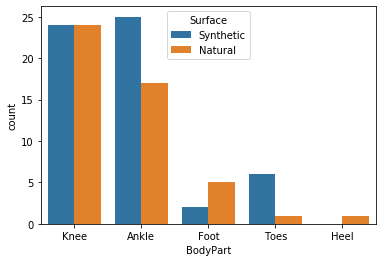

In [5]:
#quick look at the difference in number of injuries and surface
sns.countplot(x='BodyPart', hue='Surface', data = injury_record)

In [6]:
player_track_data.head()

,PlayKey,time,event,x,y,dir,dis,o,s
0,26624-1-1,0.0,huddle_start_offense,87.46,28.93,288.24,0.01,262.33,0.13
1,26624-1-1,0.1,NaN,87.45,28.92,283.91,0.01,261.69,0.12
2,26624-1-1,0.2,NaN,87.44,28.92,280.40,0.01,261.17,0.12
3,26624-1-1,0.3,NaN,87.44,28.92,278.79,0.01,260.66,0.10
4,26624-1-1,0.4,NaN,87.44,28.92,275.44,0.01,260.27,0.09


In [7]:
#number of different plays in the dataframe
player_track_data['PlayKey'].nunique()

266960

In [8]:
# number of different events(play types) in the data frame
player_track_data['event'].value_counts()

ball_snap               253271
line_set                247189
huddle_break_offense    175415
tackle                  149626
first_contact           140437
                         ...  
end_path                     8
xp_fake                      5
drop_kick                    5
extra_point_fake             5
play_submit\t                2
Name: event, Length: 80, dtype: int64

Below, join injury_recrod and player_track record to process data so each bodypart is grouped individually

In [9]:
record_track_merge = injury_record.join(player_track_data.set_index('PlayKey'),on='PlayKey')
record_track_merge.shape[0]

22223

In [10]:
#group plays by bodypart
record_track_merge.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,time,event,x,y,dir,dis,o,s
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1,0.0,punt_play,56.73,17.30,356.14,0.18,249.95,1.83
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1,0.1,NaN,56.74,17.48,355.73,0.18,248.49,1.82
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1,0.2,NaN,56.72,17.66,355.56,0.18,246.95,1.81
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1,0.3,NaN,56.69,17.84,355.84,0.18,245.09,1.79
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1,0.4,NaN,56.68,18.02,356.01,0.18,243.02,1.76


In [11]:
record_track_merge['BodyPart'].value_counts()

Knee     10549
Ankle     9942
Foot      1724
Toes         7
Heel         1
Name: BodyPart, dtype: int64

In [12]:
#remove toes and heel body part as they dont contain data from player_track_data
knee_inj = record_track_merge.loc[record_track_merge['BodyPart'] == 'Knee']
ankle_inj = record_track_merge.loc[record_track_merge['BodyPart'] == 'Ankle']
foot_inj = record_track_merge.loc[record_track_merge['BodyPart'] == 'Foot']

In [13]:
#concatenate dataframes
injury_track_data = pd.concat([knee_inj, ankle_inj], ignore_index=True)
injury_track_data = pd.concat([injury_track_data, foot_inj], ignore_index=True) 

In [14]:
injury_track_data['BodyPart'].value_counts()

Knee     10549
Ankle     9942
Foot      1724
Name: BodyPart, dtype: int64

In [15]:
#join play file to injury track data
inj_data_full = injury_track_data.merge(play_list, on='PlayKey', how='left')

In [16]:
list(inj_data_full.columns)

['PlayerKey_x',
 'GameID_x',
 'PlayKey',
 'BodyPart',
 'Surface',
 'DM_M1',
 'DM_M7',
 'DM_M28',
 'DM_M42',
 'time',
 'event',
 'x',
 'y',
 'dir',
 'dis',
 'o',
 's',
 'PlayerKey_y',
 'GameID_y',
 'RosterPosition',
 'PlayerDay',
 'PlayerGame',
 'StadiumType',
 'FieldType',
 'Temperature',
 'Weather',
 'PlayType',
 'PlayerGamePlay',
 'Position',
 'PositionGroup']

Removing Columns that are repeated with different names

In [17]:
#remove playerkey_y and gameid_y
inj_data_full = inj_data_full.drop(['PlayerKey_y', 'GameID_y'], axis=1)

In [18]:
inj_data_full = inj_data_full.drop(['event'], axis=1)

In [19]:
inj_data_full = inj_data_full.drop(['FieldType'], axis=1)

In [20]:
inj_data_full = inj_data_full.drop(['Position'], axis=1)

In [21]:
inj_data_full = inj_data_full.drop(['PositionGroup'], axis=1)

## Binary Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

In [86]:
XY = inj_data_full[['x', 'y', 'dir', 'dis', 'o', 's','DM_M42']].dropna()

In [96]:
y = XY['DM_M42']
X = XY[['x', 'y', 'dir', 'dis', 'o', 's']]

In [100]:
logit_model =sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.602531
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.039      
Dependent Variable: DM_M42           AIC:              26758.3622 
Date:               2019-12-22 22:40 BIC:              26806.4079 
No. Observations:   22195            Log-Likelihood:   -13373.    
Df Model:           5                LL-Null:          -13913.    
Df Residuals:       22189            LLR p-value:      3.2133e-231
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x         -0.0154     0.0005   -30.0113   0.0000   -0.0164   -0.0144
y          0.0204     0.0011    18.4749   0.0

In [97]:
model = LogisticRegression()
model.fit(X,y)

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)